In [35]:
from sqlalchemy import *
import numpy as np
import pylab as plt
import pandas as pd
import peakutils

%matplotlib inline

In [36]:
engine = create_engine('sqlite+pysqlite:///../SQL/72_8.db')

In [37]:
import time
start_time = time.time()
ADCdf = pd.io.sql.read_sql("SELECT * FROM ADC", engine)
#Hitdf = pd.io.sql.read_sql("SELECT * FROM Hit", engine)
#PSAdf = pd.io.sql.read_sql("SELECT * FROM PSA", engine)
ProtoMapdf = pd.io.sql.read_sql("SELECT * FROM ProtoMap", engine)
RawADCdf = pd.io.sql.read_sql("SELECT * FROM RawADC", engine)
end_time = time.time()
print end_time-start_time

361.997353077


(0, 500)

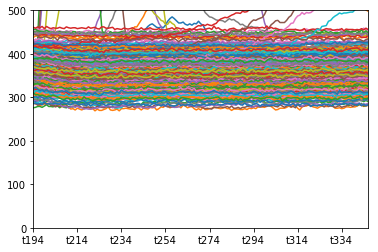

In [38]:
RawADCdf[RawADCdf['EventID']==0].iloc[:,197:350].T.plot(legend=None)
plt.ylim(0,500)


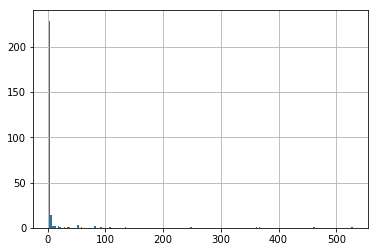

In [5]:
RawADCdf[RawADCdf['EventID']==0].iloc[:,197:350].std(axis=1).hist(bins=200)

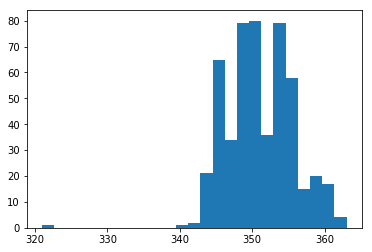

In [39]:
plt.hist(RawADCdf[RawADCdf['EventID']==0].iloc[:1,3:].values[0],bins=25);

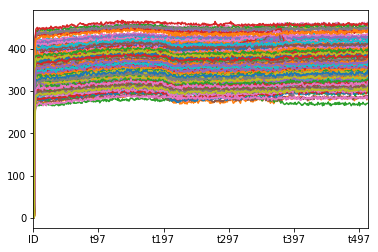

In [40]:
RawADCdf[RawADCdf['EventID']==0][RawADCdf[RawADCdf['EventID']==0].iloc[:,197:350].std(axis=1)<50].T.plot(legend=None)

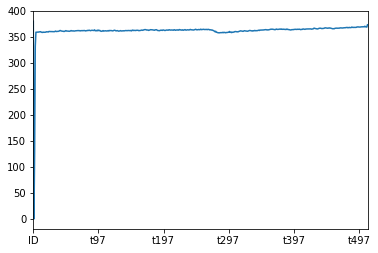

In [51]:
EID = 1
RawADCdf[RawADCdf['EventID']==EID][RawADCdf[RawADCdf['EventID']==EID].iloc[:,197:350].std(axis=1)<50].mean(axis=0).plot()
base = RawADCdf[RawADCdf['EventID']==EID][RawADCdf[RawADCdf['EventID']==EID].iloc[:,197:350].std(axis=1)<50].iloc[:,3:].mean(axis=0)

(-100, 100)

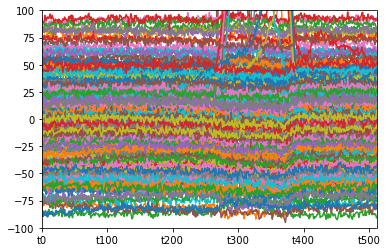

In [52]:
(RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-base).T.plot(legend=None)
plt.ylim(-100,100)

In [61]:
def Process(Event):
    mesh = Event.iloc[:,3:][Event.iloc[:,3:]>20].sum(axis=0)
    #print mesh
    return mesh
start_time = time.time()
mesh_df = ADCdf.groupby('EventID').apply(Process)
end_time = time.time()
print end_time-start_time
def convolve(event):
    mesh_convol = np.convolve(event.values,([1]*10)[::-1],'same')
    return pd.Series(mesh_convol,index=['t'+str(i) for i in range(512)])
convol_df=mesh_df.apply(convolve,axis=1)
convol_df.reset_index(inplace=True)

11.0229599476


(-5000, 5000)

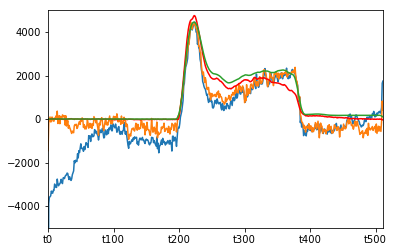

In [74]:
EID = 2
base = RawADCdf[RawADCdf['EventID']==EID][RawADCdf[RawADCdf['EventID']==EID].iloc[:,197:350].std(axis=1)<50].iloc[:,3:].mean(axis=0)

tmp1 = (RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-base).sum(axis=0)
tmp = ((RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]).sum(axis=0)-(RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]).sum(axis=0).mean())
tmp = tmp/tmp.max()*(RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-base).sum(axis=0).max()
tmp.plot()

tmp = ADCdf[ADCdf['EventID']==EID].iloc[:,3:].sum(axis=0)
tmp = tmp/tmp.max()*(RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-base).sum(axis=0).max()

tmp.plot()
tmp1+=300
tmp1.plot(c='r')
tmp = convol_df[convol_df['EventID']==EID].iloc[0,1:].T
tmp = tmp/tmp.max()*(RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-base).sum(axis=0).max()
tmp.plot()
plt.ylim([-5000,5000])


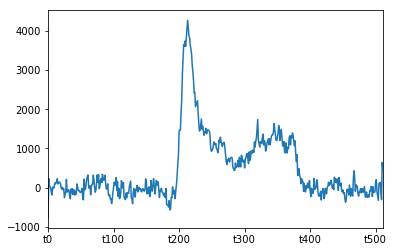

In [49]:
ADCdf[ADCdf['EventID']==EID].iloc[:,3:].sum(axis=0).plot()

In [ ]:
1+1

In [ ]:
c,e = np.histogram((RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-base).sum(axis=0).values,bins=50)
cn= c/float(sum(c))

In [ ]:
peakutils.indexes(c, thres=0.1, min_dist=1)

In [ ]:
((e[1:]+e[:-1])/2)[1]

In [ ]:
((RawADCdf[RawADCdf['EventID']==EID].iloc[:,3:]-base).sum(axis=0)).plot()
plt.ylim(-500,0)